# Intro
The following notebook focuses on the task of text categorization which consists in assigning one label, out a known set of labels, to an natural language text introduced. Three algorithms are used for this same task with the same data. Multinomial Naive Bayes, Logistic Regression and Neural Networks. The models here are not built from scratch but directly implemented using sklearn and tensorflow libraries.

In [ ]:
import os
import tarfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### Loading data

In [ ]:
# open file
file = tarfile.open('stack_overflow_16k.tar.gz')
  
# extracting file
file.extractall('./corpus')
  
file.close()

In [ ]:
classes={'python':0,'java':1,'csharp':2,'javascript':3}

In [ ]:
train_data=[]
train_target=[]
for category in os.listdir('./corpus/train'):
  for doc in os.listdir('./corpus/train/'+category):
    sequence=open('./corpus/train/'+category+'/'+doc)
    sequence=sequence.read().lower()
    train_data.append(sequence)
    train_target.append(classes[category])

In [ ]:
test_data=[]
test_target=[]
for category in os.listdir('./corpus/test'):
  for doc in os.listdir('./corpus/test/'+category):
    sequence=open('./corpus/test/'+category+'/'+doc)
    sequence=sequence.read().lower()
    test_data.append(sequence)
    test_target.append(classes[category])

### Multinomial Naive Bayes

In [ ]:
Nb_Classifier=make_pipeline(CountVectorizer(),MultinomialNB())

In [ ]:
Nb_Classifier.fit(train_data,train_target)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
predictions=Nb_Classifier.predict(test_data)

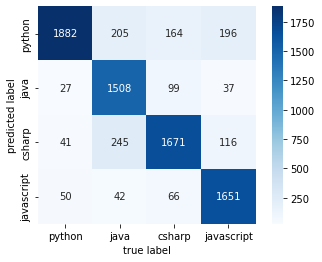

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_target, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="Blues",
            xticklabels=classes.keys(), yticklabels=classes.keys())
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
print(f" accuracy : {Nb_Classifier.score(test_data,test_target)}")

 accuracy : 0.839


### Logistic regression

In [ ]:
LR_Classifier=make_pipeline(CountVectorizer(),LogisticRegression(max_iter=1000))

In [ ]:
LR_Classifier.fit(train_data,train_target)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

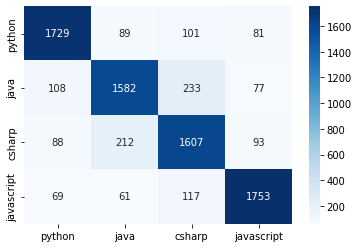

In [ ]:
preds=LR_Classifier.predict(test_data)
mat_lr= confusion_matrix(test_target,preds)
sns.heatmap(mat_lr,cmap="Blues",annot=True,fmt="d",
            xticklabels=  classes.keys(), yticklabels=classes.keys())
plt.show()

In [ ]:
print(f" accuracy : {LR_Classifier.score(test_data,test_target)}")

 accuracy : 0.833875


In [ ]:
LR_Classifier.predict(["from tensorflow.model import sequential"])

array([0])

In [ ]:
classes

{'csharp': 2, 'java': 1, 'javascript': 3, 'python': 0}

### 3. Neural network

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
train_data=tf.keras.utils.text_dataset_from_directory(directory='./corpus/train',batch_size=32,validation_split=0.2,subset='training',seed=100)
val_data=tf.keras.utils.text_dataset_from_directory(directory='./corpus/train',batch_size=32,validation_split=0.2,subset='validation',seed=100)
test_data=tf.keras.utils.text_dataset_from_directory(directory='./corpus/test',batch_size=32)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.
Found 8000 files belonging to 4 classes.
Using 1600 files for validation.
Found 8000 files belonging to 4 classes.


In [ ]:
vectorize=layers.TextVectorization(max_tokens=1000,standardize='lower',output_sequence_length=100)
text_data=train_data.map(lambda x,y: x)
vectorize.adapt(text_data)

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize(text), label
train_dataset=train_data.map(vectorize_text)
val_dataset=val_data.map(vectorize_text)
test_dataset=test_data.map(vectorize_text)

In [ ]:
DL_model=tf.keras.Sequential([layers.Embedding(input_dim=1001,output_dim=16),
                                      layers.Dropout(0.2),
                                      layers.GlobalAvgPool1D(),
                                      layers.Dropout(0.2),
                                      layers.Dense(4)])
DL_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          16016     
                                                                 
 dropout_6 (Dropout)         (None, None, 16)          0         
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 16,084
Trainable params: 16,084
Non-trainable params: 0
__________________________________________________

In [ ]:
DL_model.compile(optimizer='adam',loss=losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
hist=DL_model.fit(train_dataset,validation_data=val_dataset,epochs=20)

Epoch 1/20
200/200 [==============================] - 3s 14ms/step - loss: 0.8346 - accuracy: 0.7034 - val_loss: 0.8338 - val_accuracy: 0.7013
Epoch 2/20
200/200 [==============================] - 3s 14ms/step - loss: 0.8090 - accuracy: 0.7114 - val_loss: 0.8117 - val_accuracy: 0.7056
Epoch 3/20
200/200 [==============================] - 3s 13ms/step - loss: 0.7831 - accuracy: 0.7192 - val_loss: 0.7923 - val_accuracy: 0.7100
Epoch 4/20
200/200 [==============================] - 3s 13ms/step - loss: 0.7635 - accuracy: 0.7250 - val_loss: 0.7764 - val_accuracy: 0.7188
Epoch 5/20
200/200 [==============================] - 3s 14ms/step - loss: 0.7445 - accuracy: 0.7280 - val_loss: 0.7623 - val_accuracy: 0.7181
Epoch 6/20
200/200 [==============================] - 3s 14ms/step - loss: 0.7242 - accuracy: 0.7353 - val_loss: 0.7502 - val_accuracy: 0.7281
Epoch 7/20
200/200 [==============================] - 3s 14ms/step - loss: 0.7093 - accuracy: 0.7430 - val_loss: 0.7395 - val_accuracy: 0.7281

In [ ]:
DL_model.evaluate(test_dataset)

250/250 [==============================] - 2s 9ms/step - loss: 0.6848 - accuracy: 0.7279


[0.6847966909408569, 0.7278749942779541]

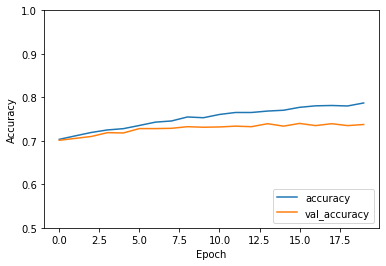

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

